# Medical Appointment No Shows Project
This analysis is part of the Udacity Data Analysis Nanodegree program and aims to explore a dataset containing aproximately 100k medical appointments from the Brazilian public health system. found insights about the problem are reviewed and communicated.focused on the question of whether or not patients show up for their appointment.

## Table of Contents
- problem:- What is the problem we are facing?
- Problem solving (by asking questions)
- Dataset & Required Libraries (numpy, pandas ...)
- Data Wrangling
- Exploratory Data Analysis
- Conclusions
## Problem
- A person makes a doctor appointment, receives all the instructions and no-show. 
## Questions
- The main question here, why the person no-show doctor appointment ?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
- What gender is the most No-Show?
- Is there a specific schedule date that is not suitable for many?
- What is the average age of those who No-Show?
- What is the age of the most Show-Up and least?
- What is the total number of people in each neighborhood?
- How many people No-Show in each neighborhood?
- Are these features(Handcap,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received) correlation for no-show? Explain .


## Dataset & Required Librarie


In [1]:
# import the necessary packages. (pandas,numpy,matplotlib,seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn import preprocessing 

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-appointment-no-shows-dataset/noshowappointments.csv


In [2]:
# Loding the dataset with pandas (noshowappointments.csv) :
df=pd.read_csv('/kaggle/input/medical-appointment-no-shows-dataset/noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling
### General Properties
##### Load data and print a few lines. Perform operations to inspect data

In [3]:
# Show 5 rows at random:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
51382,3.356719e+12,5691333,F,2016-05-12T12:12:35Z,2016-05-24T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,1,No
105981,3.514554e+11,5763986,F,2016-06-02T09:40:34Z,2016-06-02T00:00:00Z,52,SANTA MARTHA,0,0,0,0,0,0,No
13574,6.322419e+11,5698092,M,2016-05-16T07:15:13Z,2016-05-18T00:00:00Z,54,CRUZAMENTO,0,1,0,0,0,0,Yes
94432,7.749372e+11,5703899,M,2016-05-16T14:41:40Z,2016-06-07T00:00:00Z,6,SÃO BENEDITO,0,0,0,0,0,1,No
80639,8.889280e+10,5707907,F,2016-05-17T10:17:54Z,2016-05-19T00:00:00Z,19,ITARARÉ,0,0,0,0,0,0,No


There are some columns with misspellings that we need to fix (Handicap,Hipertension)

In [4]:
#rename the coulmns from Hipertension to Hypertension and from Handcap to Handicap and save changes in df 
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

look for instances of missing

In [5]:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

#### No data is missing
 ##### look for instances possibly errant data.

In [6]:
# get an overview of what we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### (ScheduledDay & AppointmentDay) must converted to datetime , Dropping irrelevant columns: PatientId


In [7]:
#Ensure that there is no duplicated
sum(df.duplicated())

0

### There is no duplicate data


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### In the age field, there are people whose age is less than 0, which is also wrong. There are people who are over 100 years old and also something wrong.



## Data Cleaning

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

In [10]:
df.Handicap.unique()


array([0, 1, 2, 3, 4])

##### Handicap should have only values 0 or 1
#### we will replace [2,3,4] by 1

In [11]:
df['Handicap'].replace(to_replace =[2, 3,4], value =1,inplace=True)
df.Handicap.unique()

array([0, 1])

In [12]:
# convert ScheduledDay from object to  datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']) 
# convert AppointmentDay from object to  datetime
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']) 
# drop PatientId
df.drop(['PatientId','AppointmentID'], axis=1 ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hypertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handicap        110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


#### ScheduledDay and AppointmentDay is data type : datetime
##### Ensure that there is no duplicate

In [13]:
#Remove incorrect data when entering the age field
df = df[(df['Age'] >= 0) & (df['Age'] <= 97)]
df['Age'].describe()


count    110508.000000
mean         37.078374
std          23.096101
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          97.000000
Name: Age, dtype: float64

#### now the age field Prepared to work
## Get label encoder mappings to see if there is a relationship between features and some of them

In [14]:
#get mappings of a label encoder 
le=preprocessing.LabelEncoder()
#get mappings of a label encoder Gender
df['Gender_labeling'] = le.fit_transform(df['Gender'])
#get mappings of a label encoder Neighbourhood
df['Neighbourhood_labeling'] = le.fit_transform(df['Neighbourhood'])
#get mappings of a label encoder No-show
df['No-show_labeling'] = le.fit_transform(df['No-show'])
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_labeling,Neighbourhood_labeling,No-show_labeling
count,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000
mean,37.078374,0.098282,0.197207,0.071850,0.030405,0.020225,0.321045,0.350056,41.738562,0.201931
std,23.096101,0.297698,0.397892,0.258241,0.171700,0.140769,0.466880,0.476989,22.359560,0.401443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.000000,0.000000
max,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000


### Now we make sure the data is clean, next step...


## Exploratory Data Analysis
#### To see if there is a clear relationship between the features and No-show


Text(0.5, 1.0, 'correlation coefficient between No-show and All features ')

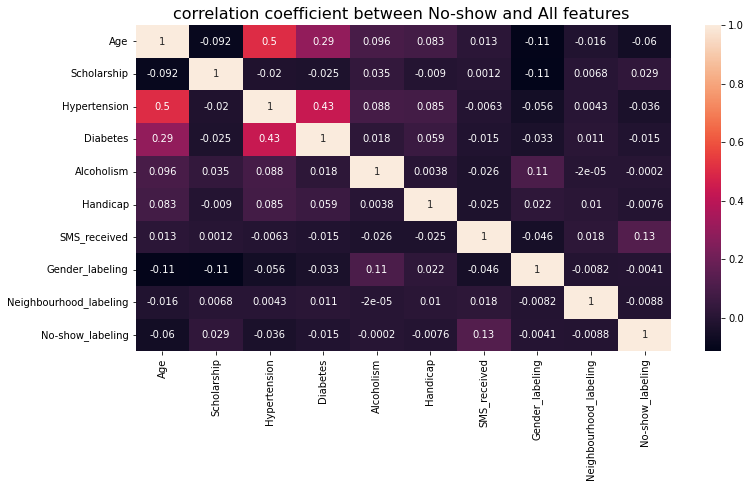

In [15]:
f,ax=plt.subplots(1,1,figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
ax.set_title('correlation coefficient between No-show and All features ',fontsize=16)

Text(0.5, 1.0, 'No-show (yes or no)')

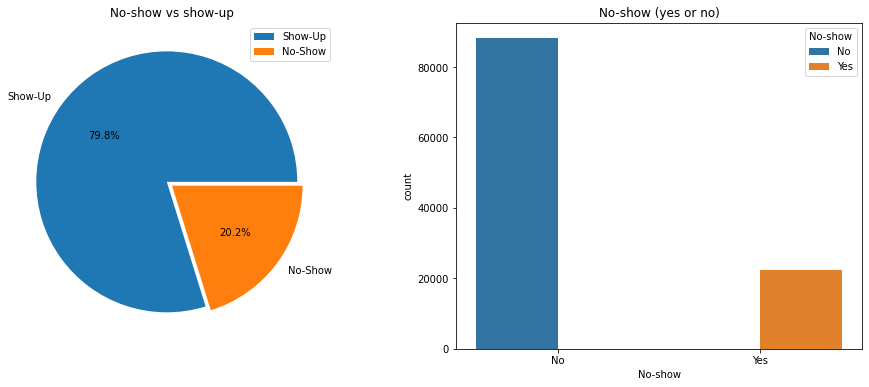

In [16]:
total_Noshow=df['No-show'].value_counts()
total_Noshow.index=['Show-Up','No-Show']

f,ax=plt.subplots(1,2,figsize=(16,6))
total_Noshow.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('No-show vs show-up')
ax[0].set_ylabel('')
ax[0].legend()

sns.countplot(x='No-show',hue="No-show",data=df,ax=ax[1])
ax[1].set_title('No-show (yes or no)')

 > note: We note that the show up (80%) rate is large, it is clear from the figure
## What gender is the most No-Show?


No-show,No,Yes
Gender,,
F,57234,14590
M,30959,7725


Text(0.5, 1.0, 'Female vs Male on No-show/show-up')

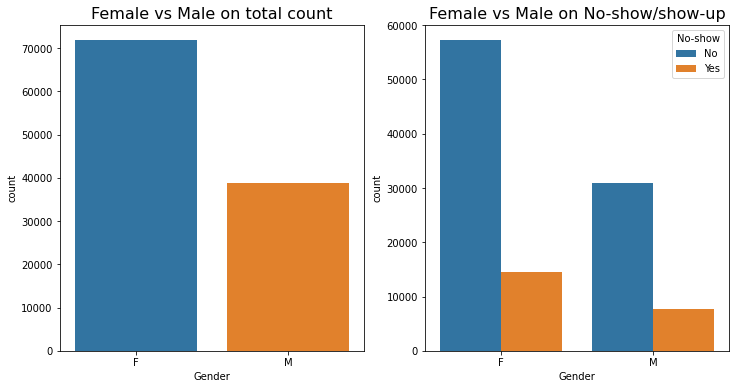

In [17]:
display(df.groupby(['Gender','No-show']).size().unstack())
f,ax=plt.subplots(1,2,figsize=(12,6))

sns.countplot(x='Gender',data=df,ax=ax[0])
ax[0].set_title('Female vs Male on total count',fontsize=16)
# Female vs Male on No-show
sns.countplot(x='Gender',hue="No-show",data=df,ax=ax[1])
ax[1].set_title('Female vs Male on No-show/show-up',fontsize=16)

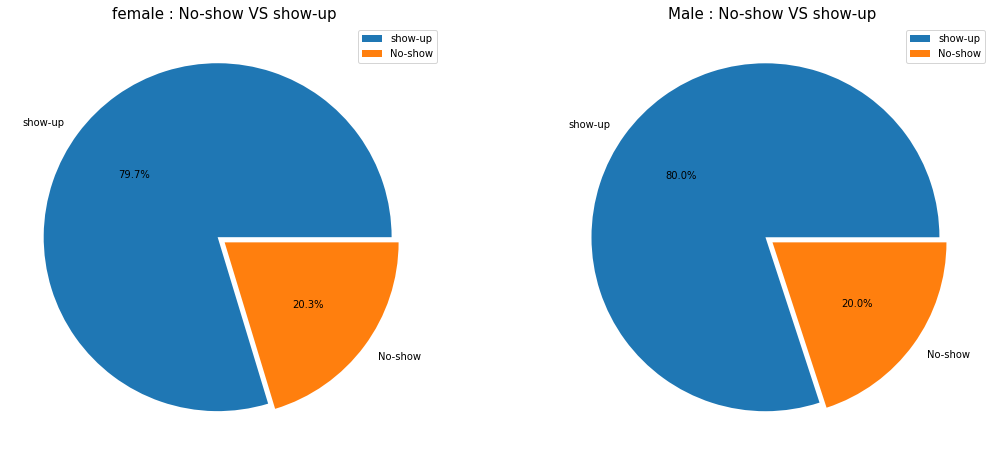

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))

female = df[df['Gender']=='F'].groupby(['No-show'])['No-show'].count()
female.index=['show-up','No-show']


male = df[df['Gender']=='M'].groupby(['No-show'])['No-show'].count()
male.index=['show-up','No-show']



female.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('female : No-show VS show-up',fontsize=15)
ax[0].set_ylabel('')
ax[0].legend()

male.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Male : No-show VS show-up',fontsize=15)
ax[1].set_ylabel('')
ax[1].legend()

>note: It is clear that there is no specific gender that no-show its date (no-show is not related to gender),The no-show rate is almost equal



## Is there a specific schedule date that is not suitable for many?


In [19]:
df['ScheduledDay_DateOnly']=df['ScheduledDay'].dt.date
df.groupby(['ScheduledDay_DateOnly','No-show']).size().unstack()

No-show,No,Yes
ScheduledDay_DateOnly,,
2015-11-10,1.0,NaN
2015-12-03,NaN,1.0
2015-12-07,8.0,2.0
2015-12-08,24.0,13.0
2015-12-14,5.0,1.0
...,...,...
2016-06-03,2191.0,306.0
2016-06-04,1.0,NaN
2016-06-06,2203.0,198.0


In [20]:
df.groupby(['ScheduledDay_DateOnly','No-show']).size().unstack()['No'].sort_values(ascending=False).head(1)


ScheduledDay_DateOnly
2016-05-02    3417.0
Name: No, dtype: float64

In [21]:
df.groupby(['ScheduledDay_DateOnly','No-show']).size().unstack()['Yes'].sort_values(ascending=False).head(1)


ScheduledDay_DateOnly
2016-05-03    893.0
Name: Yes, dtype: float64

<AxesSubplot:xlabel='ScheduledDay_DateOnly'>

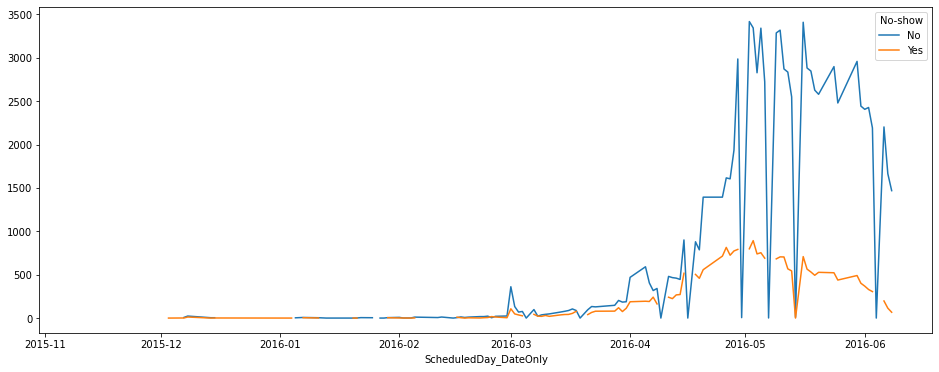

In [22]:
f,ax=plt.subplots(1,1,figsize=(16,6))
df.groupby(['ScheduledDay_DateOnly','No-show']).size().unstack().plot(ax=ax)


> note : Starting in the fourth month, people flock to the doctors, make an appointment, and show up

- The most No-show is: 2016-05-03, Count : 893.0
- The most show up is: 2016-05-02, Count : 3417.0
## What is the average age of those who No-Show?


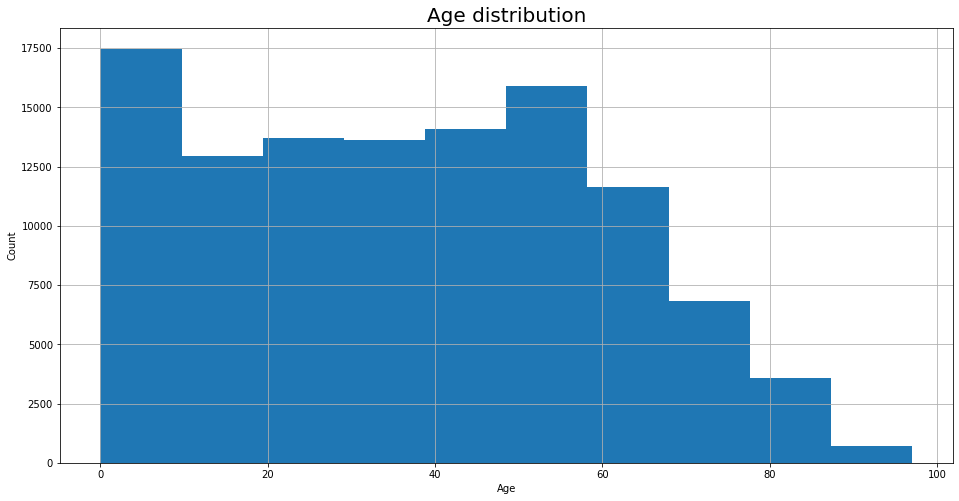

In [23]:
f,ax=plt.subplots(1,1,figsize=(16,8))
df['Age'].hist()
ax.set_title('Age distribution',fontsize=20)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.grid=True

In [24]:
print('the average age of those who No-Show :' ,df[df['No-show']=='Yes']['Age'].mean())
print('the average age of those who Show up :', df[df['No-show']=='No']['Age'].mean())

the average age of those who No-Show : 34.303965942191354
the average age of those who Show up : 37.780368056421715


Text(0.5, 1.0, 'age vs No-show/show Up')

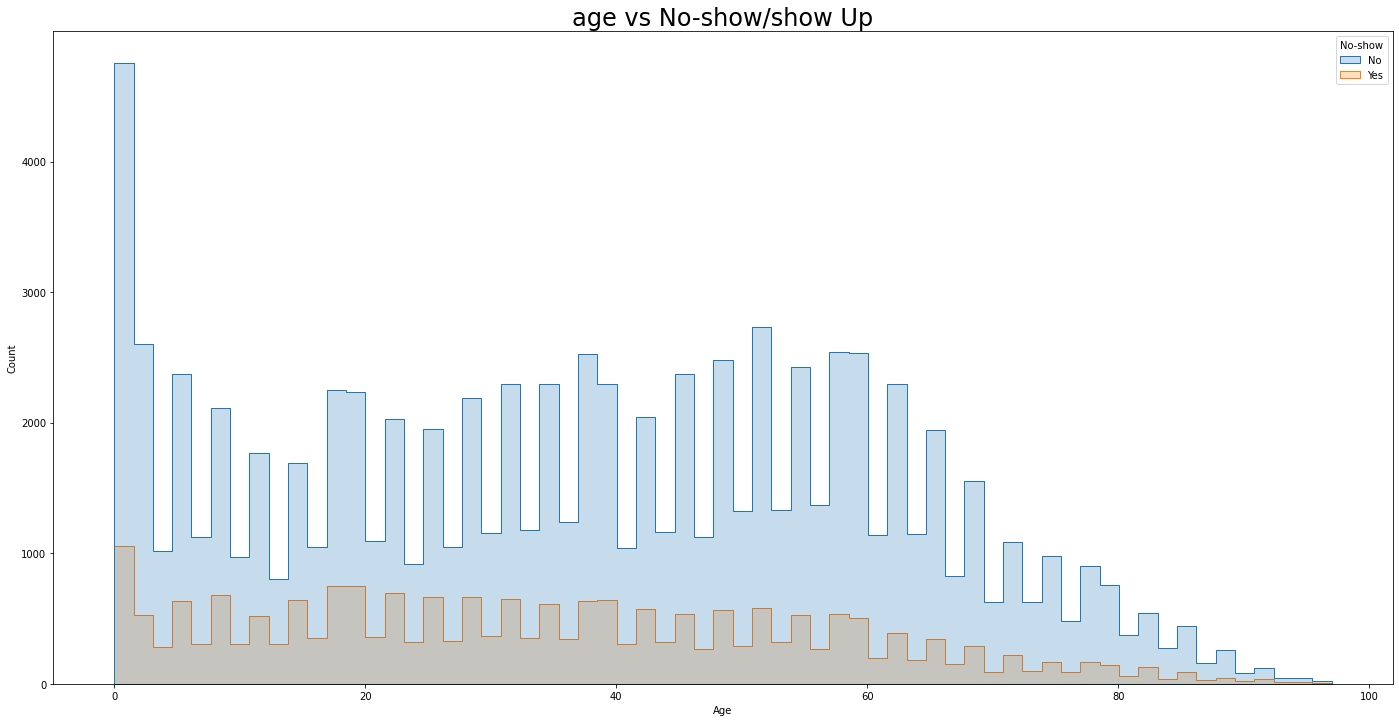

In [25]:
f,ax=plt.subplots(1,1,figsize=(24,12))

sns.histplot(data=df, x="Age",hue='No-show', element="step",ax=ax)
ax.set_title('age vs No-show/show Up',fontsize=24)

## What is the total number of people in each neighborhood?


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

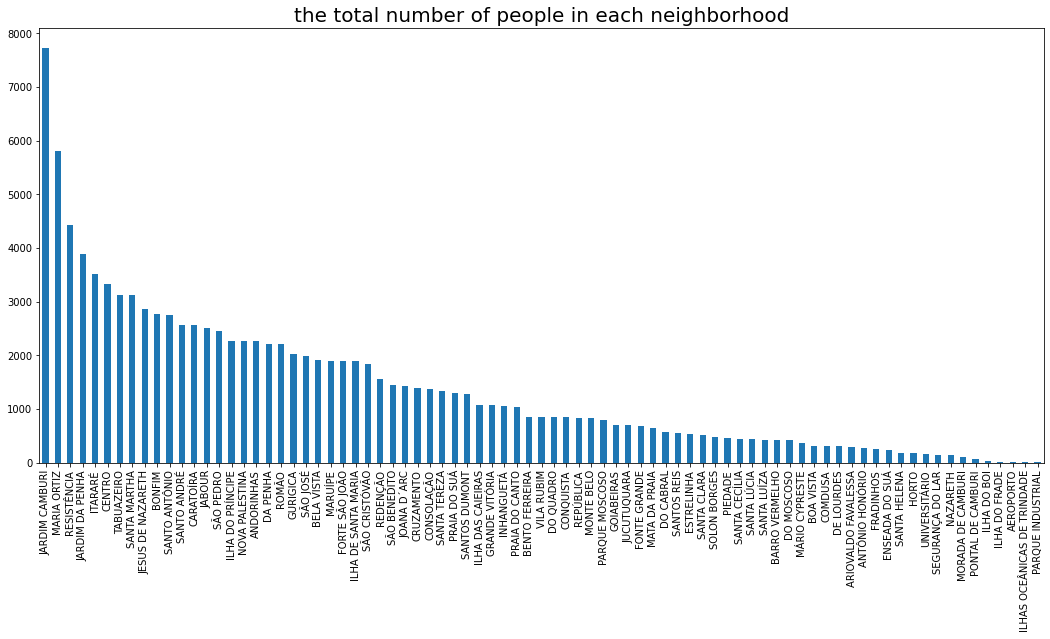

In [26]:
f,ax=plt.subplots(1,1,figsize=(18,8))
df['Neighbourhood'].value_counts().plot(kind='bar',ax=ax)
ax.set_title("the total number of people in each neighborhood",fontsize=20)
df['Neighbourhood'].value_counts()

##  No-show and Show Up rate for each Neighbourhood, divide each count by the total count , use proportions


Text(0.5, 1.0, 'The relation between Neighbourhood and No-show')

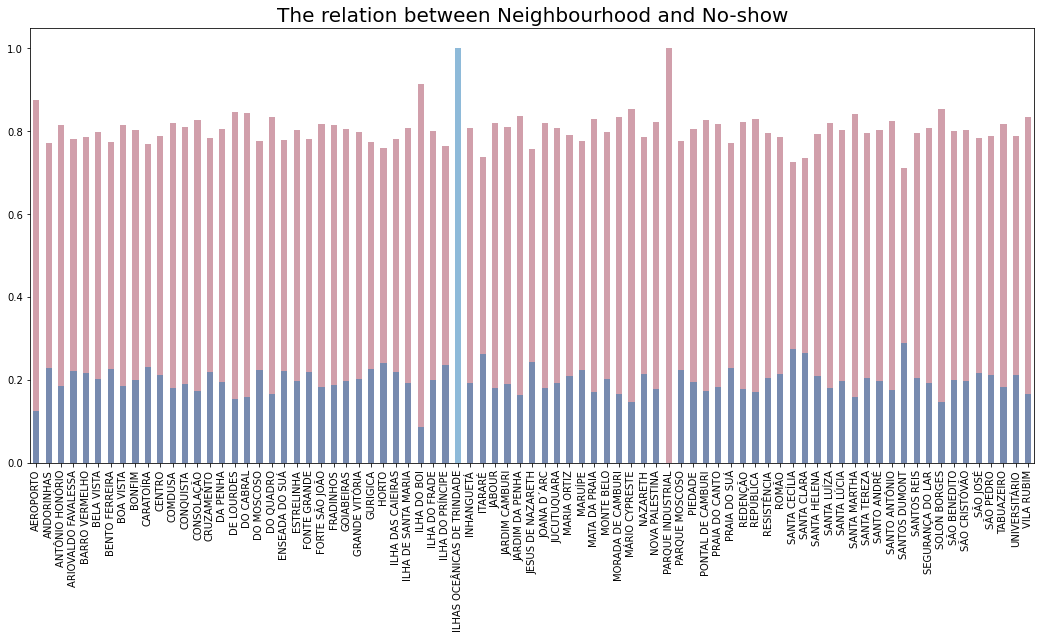

In [27]:
f,ax=plt.subplots(1,1,figsize=(18,8))
showup=df[df['No-show']=='No']['Neighbourhood'].value_counts()/df['Neighbourhood'].value_counts()
noshow= df[df['No-show']=='Yes']['Neighbourhood'].value_counts()/df['Neighbourhood'].value_counts()
(showup).plot(kind='bar',ax=ax,alpha=.5,color='#A54158')
(noshow).plot(kind='bar',ax=ax,alpha=.5,)
ax.set_title('The relation between Neighbourhood and No-show',fontsize=20)

## Are these features(Handcap,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received) correlation for no-show? Explain .


Text(0.5, 1.0, 'Scholarship vs No-show')

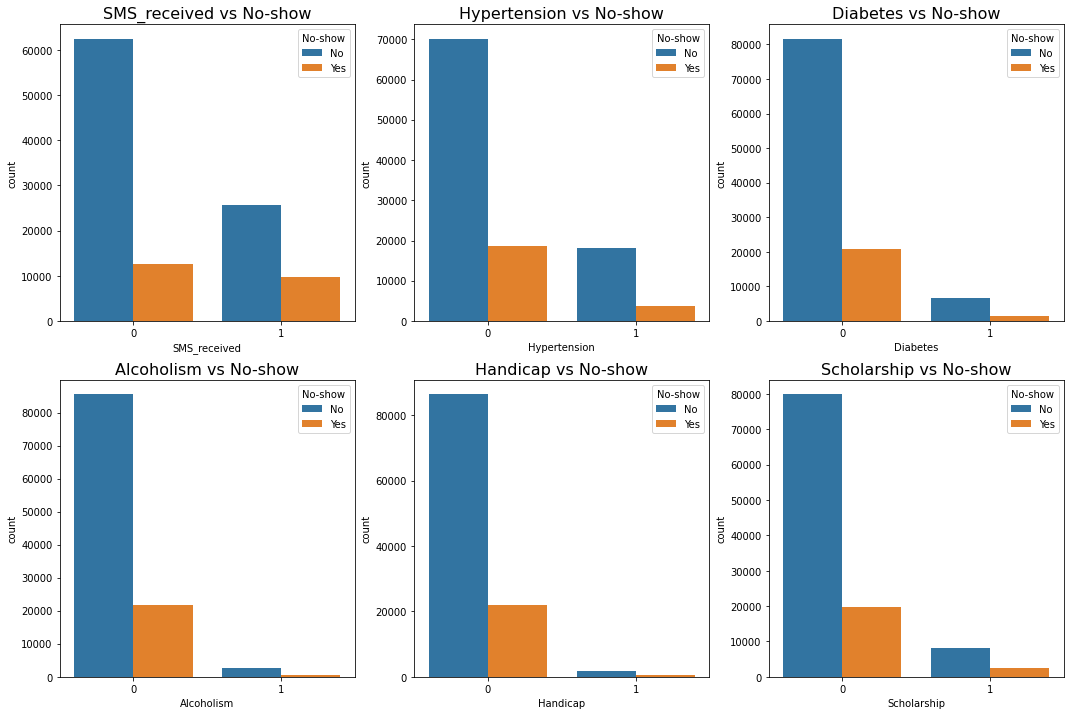

In [28]:
f,ax=plt.subplots(2,3,figsize=(18,12))
sns.countplot(x='SMS_received', data=df, hue='No-show', ax=ax[0,0]);
ax[0,0].set_title('SMS_received vs No-show',fontsize=16)

sns.countplot(x='Hypertension', data=df, hue='No-show', ax=ax[0,1]);
ax[0,1].set_title('Hypertension vs No-show',fontsize=16)

sns.countplot(x='Diabetes', data=df, hue='No-show', ax=ax[0,2]);
ax[0,2].set_title('Diabetes vs No-show',fontsize=16)

sns.countplot(x='Alcoholism', data=df, hue='No-show', ax=ax[1,0]);
ax[1,0].set_title('Alcoholism vs No-show',fontsize=16)

sns.countplot(x='Handicap', data=df, hue='No-show', ax=ax[1,1]);
ax[1,1].set_title('Handicap vs No-show',fontsize=16)

sns.countplot(x='Scholarship', data=df, hue='No-show', ax=ax[1,2]);
ax[1,2].set_title('Scholarship vs No-show',fontsize=16)

- no-show in SMS_received is higher than in SMS_unreceived.
- hypertension is more common than diabetes in the patients
- The data does not contain many alcoholics

## Data Preparation

In [29]:
df['ScheduledMonth']= df.ScheduledDay.dt.month
df['ScheduledDayNum']= df.ScheduledDay.dt.day
df['ScheduledYear']= df.ScheduledDay.dt.year

In [30]:
df['ScheduledTime']= df.ScheduledDay
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_labeling,Neighbourhood_labeling,No-show_labeling,ScheduledDay_DateOnly,ScheduledMonth,ScheduledDayNum,ScheduledYear,ScheduledTime
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,39,0,2016-04-29,4,29,2016,2016-04-29 18:38:08+00:00
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,39,0,2016-04-29,4,29,2016,2016-04-29 16:08:27+00:00
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,45,0,2016-04-29,4,29,2016,2016-04-29 16:19:04+00:00
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,54,0,2016-04-29,4,29,2016,2016-04-29 17:29:31+00:00
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,39,0,2016-04-29,4,29,2016,2016-04-29 16:07:23+00:00


In [31]:
df.loc[df.ScheduledTime.dt.strftime('%H:%M:%S').between('04:00:00','11:59:00'),'ScheduledTimeText']='Morning'
df.loc[df.ScheduledTime.dt.strftime('%H:%M:%S').between('11:59:00','18:00:00'),'ScheduledTimeText']='Noon'
df.loc[df.ScheduledTime.dt.strftime('%H:%M:%S').between('18:00:00','23:59:00'),'ScheduledTimeText']='Evenin'
   

In [32]:
df['ScheduledTimeText'].value_counts()

Morning    68356
Noon       40221
Evenin      1931
Name: ScheduledTimeText, dtype: int64

In [33]:
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,No-show,Gender_labeling,Neighbourhood_labeling,No-show_labeling,ScheduledDay_DateOnly,ScheduledMonth,ScheduledDayNum,ScheduledYear,ScheduledTime,ScheduledTimeText
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,No,0,39,0,2016-04-29,4,29,2016,2016-04-29 18:38:08+00:00,Evenin
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,No,1,39,0,2016-04-29,4,29,2016,2016-04-29 16:08:27+00:00,Noon
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,No,0,45,0,2016-04-29,4,29,2016,2016-04-29 16:19:04+00:00,Noon
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,No,0,54,0,2016-04-29,4,29,2016,2016-04-29 17:29:31+00:00,Noon
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,No,0,39,0,2016-04-29,4,29,2016,2016-04-29 16:07:23+00:00,Noon


In [34]:
df.drop(['Gender','ScheduledDay','AppointmentDay','Neighbourhood','No-show','ScheduledDay_DateOnly','ScheduledTime'], axis=1 ,inplace=True)
df.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_labeling,Neighbourhood_labeling,No-show_labeling,ScheduledMonth,ScheduledDayNum,ScheduledYear,ScheduledTimeText
0,62,0,1,0,0,0,0,0,39,0,4,29,2016,Evenin
1,56,0,0,0,0,0,0,1,39,0,4,29,2016,Noon
2,62,0,0,0,0,0,0,0,45,0,4,29,2016,Noon
3,8,0,0,0,0,0,0,0,54,0,4,29,2016,Noon
4,56,0,1,1,0,0,0,0,39,0,4,29,2016,Noon


In [35]:
#get mappings of a label encoder 
le=preprocessing.LabelEncoder()
#get mappings of a label encoder Gender
df['ScheduledTimeText'] = le.fit_transform(df['ScheduledTimeText'])
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_labeling,Neighbourhood_labeling,No-show_labeling,ScheduledMonth,ScheduledDayNum,ScheduledYear,ScheduledTimeText
count,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000,110508.000000
mean,37.078374,0.098282,0.197207,0.071850,0.030405,0.020225,0.321045,0.350056,41.738562,0.201931,4.823895,14.251900,2015.999439,1.346491
std,23.096101,0.297698,0.397892,0.258241,0.171700,0.140769,0.466880,0.476989,22.359560,0.401443,0.715746,9.345539,0.023680,0.511258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,4.000000,6.000000,2016.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,5.000000,13.000000,2016.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.000000,0.000000,5.000000,22.000000,2016.000000,2.000000
max,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000,12.000000,31.000000,2016.000000,2.000000


## Divide Data into Train & Test

In [36]:
x = df.drop(['No-show_labeling'], axis=1)
y = pd.DataFrame(df['No-show_labeling'])
display(y.head())
display(x)

,No-show_labeling
0,0
1,0
2,0
3,0
4,0


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_labeling,Neighbourhood_labeling,ScheduledMonth,ScheduledDayNum,ScheduledYear,ScheduledTimeText
0,62,0,1,0,0,0,0,0,39,4,29,2016,0
1,56,0,0,0,0,0,0,1,39,4,29,2016,2
2,62,0,0,0,0,0,0,0,45,4,29,2016,2
3,8,0,0,0,0,0,0,0,54,4,29,2016,2
4,56,0,1,1,0,0,0,0,39,4,29,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,43,5,3,2016,1
110523,51,0,0,0,0,0,1,0,43,5,3,2016,1
110524,21,0,0,0,0,0,1,0,43,4,27,2016,2
110525,38,0,0,0,0,0,1,0,43,4,27,2016,2


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
x_test.shape, y_test.shape

((33153, 13), (33153, 1))

In [39]:
#Normalization: (X-X.min())/(X.max()-X.min())
#Standardization: (X-X.mean())/X.std()

scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)


In [40]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [41]:
models = [['LinearRegression : ', LinearRegression()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor(random_state=0)],
          ['RandomForestRegressor : ', RandomForestRegressor(random_state=0)]]

for name, model in models:
    model.fit(x_train_sc, y_train_sc)
    y_pred_test_sc = model.predict(x_test_sc)  
    print(name)
    y_pred_sc = model.predict(x_train_sc)  
    print("Training R2:", round(r2_score(y_train_sc, y_pred_sc),3))
    print("Testing R2:", round(r2_score(y_test_sc, y_pred_test_sc),3))

    print("Training RMSE:", round((np.sqrt(mean_squared_error(y_train_sc, y_pred_sc))),3))
    print("Testing RMSE:", round((np.sqrt(mean_squared_error(y_test_sc, y_pred_test_sc))),3))
    
    print("=============================")

LinearRegression : 
Training R2: 0.042
Testing R2: 0.04
Training RMSE: 0.394
Testing RMSE: 0.392
DecisionTreeRegressor : 
Training R2: 0.937
Testing R2: -0.816
Training RMSE: 0.101
Testing RMSE: 0.539


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor : 
Training R2: 0.812
Testing R2: -0.047
Training RMSE: 0.174
Testing RMSE: 0.409


In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [43]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train_sc, y_train_sc)
predictions = model.predict(x_test_sc)
predictions
output = pd.DataFrame({'No-show_labeling': predictions.astype(int)})
output.index=y_test.index
output

,No-show_labeling
54354,0
72653,0
104938,0
28740,0
47294,0
...,...
9000,1
51489,0
92410,0
97060,0


In [44]:
y_pred = model.predict(x_test_sc)
y_pred_train = model.predict(x_train_sc)
print("Training", round(np.sqrt(mean_squared_error(y_train_sc, y_pred_train)),4))
print("Testing", round(np.sqrt(mean_squared_error(y_test_sc, y_pred)),4))
print("=============================")

print(r2_score(y_train_sc,y_pred_train))

Training 0.1006
Testing 0.5388
0.9374677909335287
